# Punto 7

In [11]:
import pyterrier as pt
from matplotlib import pyplot as plt

In [2]:
vaswani_dataset = pt.datasets.get_dataset("vaswani")
indexref = vaswani_dataset.get_index()
index = pt.IndexFactory.of(indexref)

data.direct.bf: 100%|██████████| 388k/388k [00:00<00:00, 421kiB/s]  
data.document.fsarrayfile: 100%|██████████| 234k/234k [00:00<00:00, 252kiB/s]  
data.inverted.bf: 100%|██████████| 362k/362k [00:00<00:00, 386kiB/s]  
data.lexicon.fsomapfile: 100%|██████████| 682k/682k [00:01<00:00, 578kiB/s]  
data.lexicon.fsomaphash: 100%|██████████| 777/777 [00:00<00:00, 774kiB/s]
data.lexicon.fsomapid: 100%|██████████| 30.3k/30.3k [00:00<00:00, 128kiB/s] 
data.meta-0.fsomapfile: 100%|██████████| 725k/725k [00:01<00:00, 532kiB/s]  
data.meta.idx: 100%|██████████| 89.3k/89.3k [00:00<00:00, 177kiB/s] 
data.meta.zdata: 100%|██████████| 224k/224k [00:00<00:00, 240kiB/s]  
data.properties: 100%|██████████| 4.29k/4.29k [00:00<?, ?iB/s]
md5sums: 100%|██████████| 619/619 [00:00<?, ?iB/s] 
Java started (triggered by IndexFactory.of) and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]


In [3]:
topics = vaswani_dataset.get_topics()
topics.head(10)

query-text.trec: 10.7kiB [00:00, 5.50MiB/s]                  

22:21:53.067 [main] WARN org.terrier.applications.batchquerying.TRECQuery -- trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


,qid,query
0,1,measurement of dielectric constant of liquids ...
1,2,mathematical analysis and design details of wa...
2,3,use of digital computers in the design of band...
3,4,systems of data coding for information transfer
4,5,use of programs in engineering testing of comp...
5,6,number representation in binary machines
6,7,secondary emission of electrons by positive io...
7,8,measurement of plasma temperatures in arc disc...
8,9,characteristics of the single electrode discha...
9,10,methods of calculating instantaneous power dis...


In [4]:
retr = pt.terrier.Retriever(index, controls = {"wmodel": "TF_IDF"})

qrels = vaswani_dataset.get_qrels()

retr.setControl("wmodel", "TF_IDF")

qrels: 24.3kiB [00:00, 8.29MiB/s]                  


### A_ Global (promedio de todas la consultas), para las siguientes métricas: P@10, AP, NDCG@10 e incluya la gráfica de R–P en los 11 puntos estándar.

In [ ]:
res=retr.transform(topics)

metrics_global = ["P_10", "map", "ndcg_cut_10"]
evaluate_global = pt.Evaluate(res, qrels, metrics=metrics_global)
print("Métricas globales:")
evaluate_global

Métricas globales:


{'P_10': 0.35913978494623655,
 'map': 0.29090543005529873,
 'ndcg_cut_10': 0.4444105837023614}

C:\Users\lukfi\AppData\Local\Temp\ipykernel_13588\2530994602.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) evaluate. (Use pt.Evaluate instead) -- Deprecated since version 0.9.
  recall = pt.Utils.evaluate(res, qrels, metrics=["iprec_at_recall_0.00", "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", "iprec_at_recall_0.40",


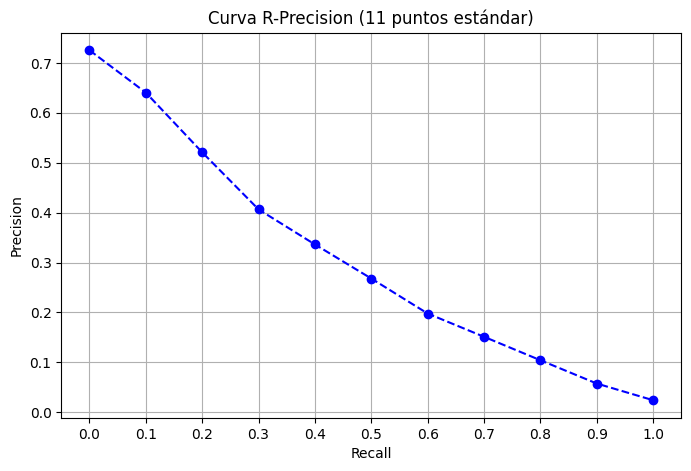

In [18]:

recall = pt.Utils.evaluate(res, qrels, metrics=["iprec_at_recall_0.00", "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", "iprec_at_recall_0.40",
                                       "iprec_at_recall_0.50", "iprec_at_recall_0.60", "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90",
                                       "iprec_at_recall_1.00"])

precision_values = [
    recall["iprec_at_recall_0.00"],
    recall["iprec_at_recall_0.10"],
    recall["iprec_at_recall_0.20"],
    recall["iprec_at_recall_0.30"],
    recall["iprec_at_recall_0.40"],
    recall["iprec_at_recall_0.50"],
    recall["iprec_at_recall_0.60"],
    recall["iprec_at_recall_0.70"],
    recall["iprec_at_recall_0.80"],
    recall["iprec_at_recall_0.90"],
    recall["iprec_at_recall_1.00"]
]

recall_points = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.figure(figsize=(8, 5))
plt.plot(recall_points, precision_values, marker="o", linestyle="--", color="b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva R-Precision (11 puntos estándar)")
plt.grid(True)
plt.xticks(recall_points)
plt.show()

### B_ Individual (por query), para las mismas métricas, calculando la distribución de los valores en cada caso.

In [20]:
# Evaluación por query
metrics_individual = ["P_10", "map", "ndcg_cut_10"]
eval_by_query = pt.Evaluate(res, qrels, metrics=metrics_individual, perquery=True)

print("Métricas por query:")
for query_id, metrics in eval_by_query.items():
    print(f"Query ID: {query_id}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("-" * 20)

Métricas por query:
Query ID: 1
map: 0.2688603632606692
P_10: 0.5
ndcg_cut_10: 0.5736899196572436
--------------------
Query ID: 2
map: 0.056448212440045914
P_10: 0.1
ndcg_cut_10: 0.09478836436955078
--------------------
Query ID: 3
map: 0.23945401361406524
P_10: 0.3
ndcg_cut_10: 0.40002324830925196
--------------------
Query ID: 4
map: 0.4939494140851607
P_10: 0.3
ndcg_cut_10: 0.6548086577531307
--------------------
Query ID: 5
map: 0.0
P_10: 0.0
ndcg_cut_10: 0.0
--------------------
Query ID: 6
map: 0.2421600270476016
P_10: 0.2
ndcg_cut_10: 0.31488013066763093
--------------------
Query ID: 7
map: 0.5674516736006812
P_10: 0.6
ndcg_cut_10: 0.5658245193320782
--------------------
Query ID: 8
map: 0.5
P_10: 0.1
ndcg_cut_10: 0.6309297535714575
--------------------
Query ID: 9
map: 0.5222222222222223
P_10: 0.1
ndcg_cut_10: 0.6131471927654584
--------------------
Query ID: 10
map: 0.1214856066519094
P_10: 0.2
ndcg_cut_10: 0.22400556151517553
--------------------
Query ID: 11
map: 0.0679976

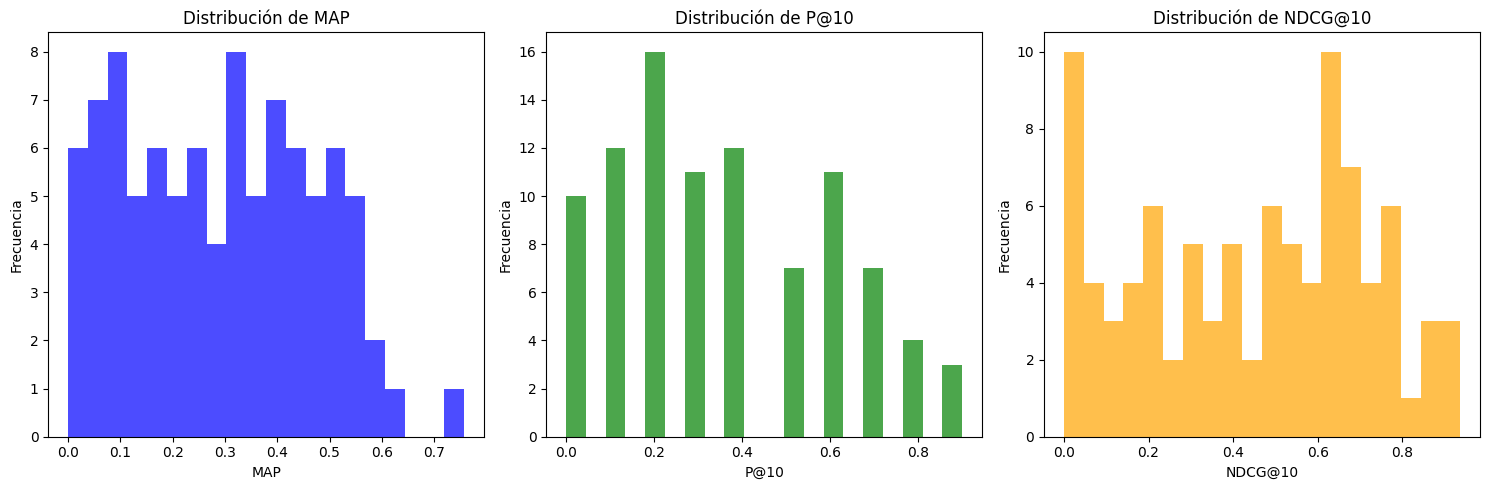

In [50]:
# Extraer las métricas de eval_by_query
map_values = [metrics["map"] for metrics in eval_by_query.values()]
p10_values = [metrics["P_10"] for metrics in eval_by_query.values()]
ndcg10_values = [metrics["ndcg_cut_10"] for metrics in eval_by_query.values()]

# Crear histogramas para cada métrica
plt.figure(figsize=(15, 5))

# Histograma para MAP
plt.subplot(1, 3, 1)
plt.hist(map_values, bins=20, color='blue', alpha=0.7)
plt.title("Distribución de MAP")
plt.xlabel("MAP")
plt.ylabel("Frecuencia")

# Histograma para P@10
plt.subplot(1, 3, 2)
plt.hist(p10_values, bins=20, color='green', alpha=0.7)
plt.title("Distribución de P@10")
plt.xlabel("P@10")
plt.ylabel("Frecuencia")

# Histograma para NDCG@10
plt.subplot(1, 3, 3)
plt.hist(ndcg10_values, bins=20, color='orange', alpha=0.7)
plt.title("Distribución de NDCG@10")
plt.xlabel("NDCG@10")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [52]:
import numpy as np
from scipy import stats

# Calculate statistics for each metric
metrics_stats = {
    'MAP': {
        'median': np.median(map_values),
        'mean': np.mean(map_values),
        'mode': stats.mode(map_values, keepdims=True).mode[0]
    },
    'P@10': {
        'median': np.median(p10_values),
        'mean': np.mean(p10_values),
        'mode': stats.mode(p10_values, keepdims=True).mode[0]
    },
    'NDCG@10': {
        'median': np.median(ndcg10_values),
        'mean': np.mean(ndcg10_values),
        'mode': stats.mode(ndcg10_values, keepdims=True).mode[0]
    }
}

# Print results
for metric, stats_values in metrics_stats.items():
    print(f"\n{metric}:")
    print(f"Median: {stats_values['median']:.4f}")
    print(f"Mean: {stats_values['mean']:.4f}")
    print(f"Mode: {stats_values['mode']:.4f}")


MAP:
Median: 0.2987
Mean: 0.2909
Mode: 0.0000

P@10:
Median: 0.3000
Mean: 0.3591
Mode: 0.2000

NDCG@10:
Median: 0.4888
Mean: 0.4444
Mode: 0.0000


C:\Users\lukfi\AppData\Local\Temp\ipykernel_13588\3276522079.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) evaluate. (Use pt.Evaluate instead) -- Deprecated since version 0.9.
  recall_individual = pt.Utils.evaluate(res, qrels, metrics=["iprec_at_recall_0.00", "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", "iprec_at_recall_0.40",


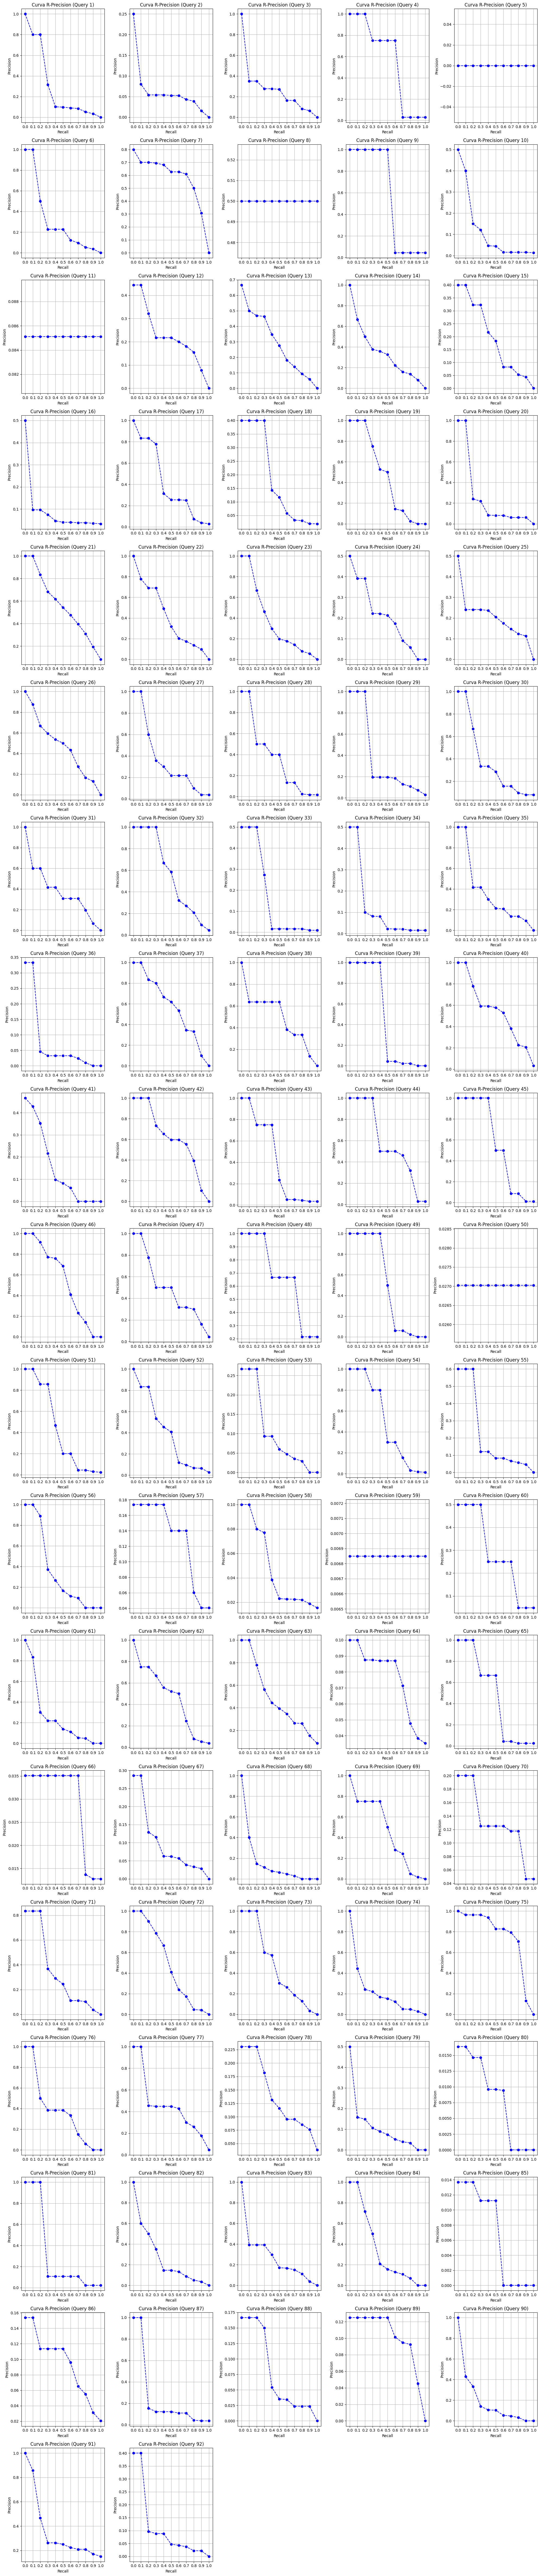

In [42]:
recall_individual = pt.Utils.evaluate(res, qrels, metrics=["iprec_at_recall_0.00", "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", "iprec_at_recall_0.40",
                                       "iprec_at_recall_0.50", "iprec_at_recall_0.60", "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90",
                                       "iprec_at_recall_1.00"], perquery=True)

precision_values_by_query = []
for i in range(1,len(recall_individual)):
    recall = recall_individual[str(i)]
    precision_values = [
        recall["iprec_at_recall_0.00"],
        recall["iprec_at_recall_0.10"],
        recall["iprec_at_recall_0.20"],
        recall["iprec_at_recall_0.30"],
        recall["iprec_at_recall_0.40"],
        recall["iprec_at_recall_0.50"],
        recall["iprec_at_recall_0.60"],
        recall["iprec_at_recall_0.70"],
        recall["iprec_at_recall_0.80"],
        recall["iprec_at_recall_0.90"],
        recall["iprec_at_recall_1.00"]
    ]
    precision_values_by_query.append(precision_values)

recall_points = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

import math

num_queries = len(precision_values_by_query)
cols = 5  # Number of columns in the subplot grid
rows = math.ceil(num_queries / cols)  # Calculate the required number of rows

plt.figure(figsize=(20, rows * 5))
for i, precision_values in enumerate(precision_values_by_query):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust the grid size
    plt.plot(recall_points, precision_values, marker="o", linestyle="--", color="b")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curva R-Precision (Query {i + 1})")
    plt.grid(True)
    plt.xticks(recall_points)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()